# Import Necessary Libraries

In [2]:
!pip install nltk
!pip install textblob
!pip install wordcloud

from warnings import filterwarnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("vader_lexicon")

filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

  Using cached nltk-3.8.1-py3-none-any.whl (1.5 MB)
     ------------------------------------ 269.5/269.5 kB 534.5 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 626.3/626.3 kB 240.4 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


     ------------------------------------ 300.2/300.2 kB 229.2 kB/s eta 0:00:00


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\manid\AppData\Roaming\nltk_data...


# Import Dataset

In [5]:
df = pd.read_csv("reviews1.csv", sep=",")
df

,Name,Stars,Title,Date,Description
0,D,5.00,5.0 out of 5 stars\nGreat Product and some inf...,30/06/2023,This product is just great. I have been using ...
1,Elizabeth Darcy,5.00,5.0 out of 5 stars\nSuper Easy To Use - Get La...,29/07/2023,I'm kind of a freak about organization and I l...
2,Sunny,5.00,5.0 out of 5 stars\nPowerful Little Gadget!,13/11/2023,I am obsessed with this little thing! Its so c...
3,Fatima Germana,NaN,Maravilhoso,26/08/2023,Fácil e prático.\nRead more
4,Ash,NaN,Good Product,04/09/2023,The labels are pretty easy to make but if you ...
...,...,...,...,...,...
635,Fatima Germana,NaN,Maravilhoso,26/08/2023,Fácil e prático.\nRead more
636,Ash,NaN,Good Product,04/09/2023,The labels are pretty easy to make but if you ...
637,Caitlyn,NaN,Bought as a gift,09/11/2023,I already have one and bought this for a gift....
638,Kim,NaN,It does what it's supposed to do,11/07/2023,I bought this to label travel toiletry bottles...


# Text Processing

In [6]:
def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('[^\w\s]','')

  # Removing Numbers
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('\d','')

  # StopWords
  sw = stopwords.words('english')
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
  temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
  drops = temp_df[temp_df <= 1]
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

  # Lemmatize
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

  return dataframe

In [7]:
df = text_preprocessing(df, "Description")

In [8]:
df["Description"].head()

0    product great using several week constantly ap...
1    im kind freak organization label everything th...
2    obsessed little thing cute compact easy use go...
3                                 fácil e prático read
4    label pretty easy make dont label bold come lo...
Name: Description, dtype: object

# Text Visualization

In [9]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
  tf.columns = ["words", "tf"]

  if barplot:
    # Bar Plot
    tf[tf["tf"]>1000].plot.barh(x="words", y="tf")
    plt.title("Calculation of Term Frequencies : barplot")
    plt.show()

  if wordcloud:
    # WordCloud
    text = " ".join(i for i in dataframe[dependent_var])
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=[10, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Calculation of Term Frequencies : wordcloud")
    plt.show()
    wordcloud.to_file("wordcloud.png")


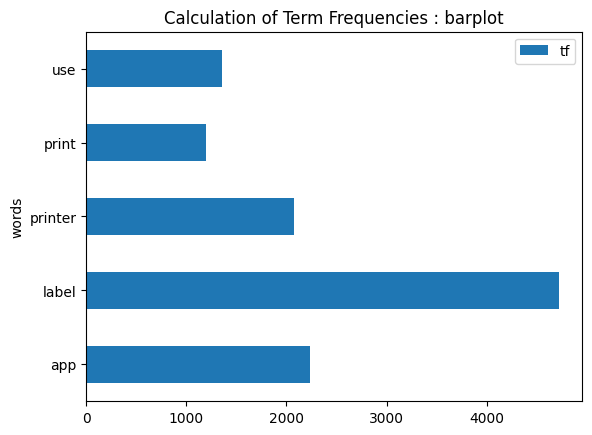

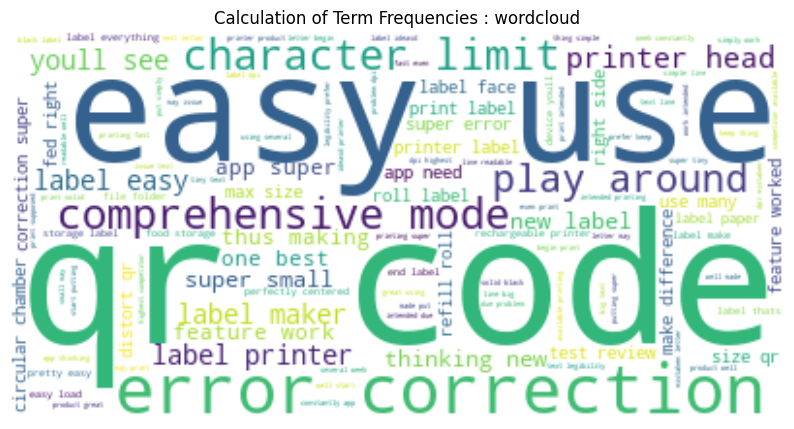

In [10]:
text_visulaization(df, "Description")

# Sentiment Analysis

In [11]:
def create_polarity_scores(dataframe, dependent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe["polarity_score"] = dataframe[dependent_var].apply(lambda x: sia.polarity_scores(x)["compound"])

In [12]:
create_polarity_scores(df, "Description")

In [14]:
df

,Name,Stars,Title,Date,Description,polarity_score
0,D,5.00,5.0 out of 5 stars\nGreat Product and some inf...,30/06/2023,product great using several week constantly ap...,1.00
1,Elizabeth Darcy,5.00,5.0 out of 5 stars\nSuper Easy To Use - Get La...,29/07/2023,im kind freak organization label everything th...,1.00
2,Sunny,5.00,5.0 out of 5 stars\nPowerful Little Gadget!,13/11/2023,obsessed little thing cute compact easy use go...,0.96
3,Fatima Germana,NaN,Maravilhoso,26/08/2023,fácil e prático read,0.00
4,Ash,NaN,Good Product,04/09/2023,label pretty easy make dont label bold come lo...,0.75
...,...,...,...,...,...,...
635,Fatima Germana,NaN,Maravilhoso,26/08/2023,fácil e prático read,0.00
636,Ash,NaN,Good Product,04/09/2023,label pretty easy make dont label bold come lo...,0.75
637,Caitlyn,NaN,Bought as a gift,09/11/2023,already one bought gift love label maker label...,0.92
638,Kim,NaN,It does what it's supposed to do,11/07/2023,bought label travel toiletry bottle allowed co...,-0.15


# Feature Engineering

In [15]:
# Create Lables
def create_label(dataframe, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe[independent_var] = dataframe[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataframe[independent_var] = LabelEncoder().fit_transform(dataframe[independent_var])

  X = dataframe[dependent_var]
  y = dataframe[independent_var]

  return X, y

In [16]:
X, y = create_label(df, "Description", "sentiment_label")

In [17]:
# Split Dataset
def split_dataset(dataframe, X, y):
  train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
  return train_x, test_x, train_y, test_y

In [18]:
train_x, test_x, train_y, test_y = split_dataset(df, X, y)

In [19]:
def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

In [20]:
x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)

In [21]:
def create_features_TFIDF_word(train_x, test_x):
  # TF-IDF word
  tf_idf_word_vectorizer = TfidfVectorizer()
  x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(train_x)
  x_test_tf_idf_word = tf_idf_word_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_word, x_test_tf_idf_word

In [22]:
x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)

In [23]:
def create_features_TFIDF_ngram(train_x, test_x):
  # TF-IDF ngram
  tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2,3))
  x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(train_x)
  x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_ngram, x_test_tf_idf_ngram

In [24]:
x_train_tf_idf_ngram, x_test_tf_idf_ngram = create_features_TFIDF_ngram(train_x, test_x)

In [25]:
def create_features_TFIDF_chars(train_x, test_x):
  # TF-IDF Characters
  tf_idf_chars_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2,3))
  x_train_tf_idf_chars = tf_idf_chars_vectorizer.fit_transform(train_x)
  x_test_tf_idf_chars = tf_idf_chars_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_chars, x_test_tf_idf_chars

In [26]:
x_train_tf_idf_chars, x_test_tf_idf_chars = create_features_TFIDF_chars(train_x, test_x)

# Sentiment Modeling - Create Model

In [27]:
# Random Forest
def crate_model_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_count = RandomForestClassifier()
  rf_model_count = rf_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  rf_word = RandomForestClassifier()
  rf_model_word = rf_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  # TF-IDF ngram
  x_train_tf_idf_ngram, x_test_tf_idf_ngram = create_features_TFIDF_ngram(train_x, test_x)
  rf_ngram = RandomForestClassifier()
  rf_model_ngram = rf_ngram.fit(x_train_tf_idf_ngram, train_y)
  accuracy_ngram = cross_val_score(rf_model_ngram, x_test_tf_idf_ngram, test_y, cv=10).mean()
  print("Accuracy TF-IDF ngram: %.3f" % accuracy_ngram)

  # TF-IDF chars

  rf_chars = RandomForestClassifier()
  rf_model_chars = rf_chars.fit(x_train_tf_idf_chars, train_y)
  accuracy_chars = cross_val_score(rf_model_chars, x_test_tf_idf_chars, test_y, cv=10).mean()
  print("Accuracy TF-IDF Characters: %.3f" % accuracy_chars)

  return rf_model_count, rf_model_word, rf_model_ngram, rf_model_chars

In [28]:
rf_model_count, rf_model_word, rf_model_ngram, rf_model_chars = crate_model_randomforest(train_x, test_x)

Accuracy - Count Vectors: 1.000
Accuracy - TF-IDF Word: 1.000
Accuracy TF-IDF ngram: 1.000
Accuracy TF-IDF Characters: 1.000


# Model Tuning

In [29]:
def model_tuning_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_model_count = RandomForestClassifier(random_state=1)
  rf_params = {"max_depth": [2,5,8, None],
               "max_features": [2,5,8, "auto"],
               "n_estimators": [100,500,1000],
               "min_samples_split": [2,5,10]}
  rf_best_grid = GridSearchCV(rf_model_count, rf_params, cv=10, n_jobs=-1, verbose=False).fit(x_train_count_vectorizer, train_y)
  rf_model_count_final = rf_model_count.set_params(**rf_best_grid.best_params_, random_state=1).fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count_final, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  return rf_model_count_final

In [30]:
rf_model_count_final = model_tuning_randomforest(train_x, test_x)

Accuracy - Count Vectors: 1.000


# Prediction

In [31]:
def predict_count(train_x, model, new_comment):
  new_comment= pd.Series(new_comment)
  new_comment = CountVectorizer().fit(train_x).transform(new_comment)
  result = model.predict(new_comment)
  # print(result)
  if result==1:
    print("Comment is Pozitive")
      
  else: 
    print("Comment is Negative")

In [32]:
# Random Forest
predict_count(train_x, model=rf_model_word, new_comment="""For the last 13 years i have using the samsung fully automatic washing machines that was gifted by my colloquies for my marriage. It worked for the last 12.5 years successfully without any issue.Its easy to handling and reduce our work load.I have used the same type of machines last year in amazon that also working good.Now our team gifted this machine to my colloquies to his marriage as gift.Happy married life to them""")

Comment is Negative


In [33]:
# Sample Review
new_comment=pd.Series(df["Description"].sample(30).values)
print(new_comment[1])

obsessed little thing cute compact easy use got excited downloaded app night play around interface user friendly insane amount customizations good amount play around withonce got package opened used right away user error end like putting roll correct figuring margin needed print center barely looked user manual thats faultthe quality print incredible clearly make image cat sticker test printed see error margin second photo turned good fiance asked put snowboard course ill using make actual label hahai wish computer driver printer hopefully able use ipad well read


In [34]:
# Sample Review - Random Forest
for i in range(len(new_comment)):
    predict_count(train_x, model=rf_model_count, new_comment=new_comment[i])

Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Negative
Comment is Negative
Comment is Pozitive
Comment is Negative
Comment is Negative
Comment is Negative
Comment is Pozitive
Comment is Pozitive
Comment is Negative
Comment is Pozitive
Comment is Pozitive
Comment is Negative
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive
Comment is Pozitive


In [35]:
df['Description'][1]

'im kind freak organization label everything thank goodness little printer almost effortless use similar size cell phone twice thick way lighter making easy pop purse backpack briefcase need biggest issue thermal printer normally loading paper correctly printer easy load seat spool onto raised circle feed end label narrow slot close lid press button top machine autofeed label correct position sacrificing first label thats typical experience doesnt matter feed little lot slot autofeed correctly set label regardless see picture end label perfectly centered autofeed setting positioning label right place border however pretty tight bottom label thats likely software issue print screen phone look perfectly centered paper seated properly printer print quality good find help text medium large relation size label best quality generally prefer label larger text anyway since point putting label something able identify glancethe us label printer virtually endless spice jar file folder everything 

In [39]:
import pickle

with open('Model.pkl', 'wb') as f:
    pickle.dump(rf_model_word, f)